# Part 1 : Exploratory Data Analysis

## Libraries import

In [11]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

## Get data

### Spider dataset

In [35]:
data_spider = load_dataset("xlangai/spider")


In [36]:
data_spider

DatasetDict({
    train: Dataset({
        features: ['db_id', 'query', 'question', 'query_toks', 'query_toks_no_value', 'question_toks'],
        num_rows: 7000
    })
    validation: Dataset({
        features: ['db_id', 'query', 'question', 'query_toks', 'query_toks_no_value', 'question_toks'],
        num_rows: 1034
    })
})

In [37]:
data_spider.data

{'train': MemoryMappedTable
 db_id: string
 query: string
 question: string
 query_toks: list<item: string>
   child 0, item: string
 query_toks_no_value: list<item: string>
   child 0, item: string
 question_toks: list<item: string>
   child 0, item: string
 ----
 db_id: [["department_management","department_management","department_management","department_management","department_management",...,"university_basketball","university_basketball","university_basketball","university_basketball","university_basketball"],["university_basketball","university_basketball","university_basketball","university_basketball","university_basketball",...,"gas_company","gas_company","gas_company","gas_company","gas_company"],...,["soccer_2","soccer_2","soccer_2","soccer_2","soccer_2",...,"game_1","game_1","game_1","game_1","game_1"],["game_1","game_1","game_1","game_1","game_1",...,"culture_company","culture_company","culture_company","culture_company","culture_company"]]
 query: [["SELECT count(*) FROM 

In [38]:
data_spider.num_rows

{'train': 7000, 'validation': 1034}

In [39]:
data_spider_train = load_dataset("xlangai/spider", split="train")
data_spider_test = load_dataset("xlangai/spider", split="validation")


In [40]:
df_spider_train = data_spider_train.to_pandas()
df_spider_train.head()

,db_id,query,question,query_toks,query_toks_no_value,question_toks
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...","[How, many, heads, of, the, departments, are, ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","[List, the, name, ,, born, state, and, age, of..."
2,department_management,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","[List, the, creation, year, ,, name, and, budg..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...,"[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...","[What, are, the, maximum, and, minimum, budget..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...","[What, is, the, average, number, of, employees..."


In [41]:
df_spider_test = data_spider_test.to_pandas()
df_spider_test.head()

,db_id,query,question,query_toks,query_toks_no_value,question_toks
0,concert_singer,SELECT count(*) FROM singer,How many singers do we have?,"[SELECT, count, (, *, ), FROM, singer]","[select, count, (, *, ), from, singer]","[How, many, singers, do, we, have, ?]"
1,concert_singer,SELECT count(*) FROM singer,What is the total number of singers?,"[SELECT, count, (, *, ), FROM, singer]","[select, count, (, *, ), from, singer]","[What, is, the, total, number, of, singers, ?]"
2,concert_singer,"SELECT name , country , age FROM singer ORDE...","Show name, country, age for all singers ordere...","[SELECT, name, ,, country, ,, age, FROM, singe...","[select, name, ,, country, ,, age, from, singe...","[Show, name, ,, country, ,, age, for, all, sin..."
3,concert_singer,"SELECT name , country , age FROM singer ORDE...","What are the names, countries, and ages for ev...","[SELECT, name, ,, country, ,, age, FROM, singe...","[select, name, ,, country, ,, age, from, singe...","[What, are, the, names, ,, countries, ,, and, ..."
4,concert_singer,"SELECT avg(age) , min(age) , max(age) FROM s...","What is the average, minimum, and maximum age ...","[SELECT, avg, (, age, ), ,, min, (, age, ), ,,...","[select, avg, (, age, ), ,, min, (, age, ), ,,...","[What, is, the, average, ,, minimum, ,, and, m..."


In [42]:
df_spider_train.shape

(7000, 6)

In [43]:
df_spider_test.shape

(1034, 6)

In [ ]:
frames_spider = [df_spider_train,df_spider_test]
df_spider = pd.concat(frames_spider)
df_spider.head()

,db_id,query,question,query_toks,query_toks_no_value,question_toks
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...","[How, many, heads, of, the, departments, are, ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","[List, the, name, ,, born, state, and, age, of..."
2,department_management,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","[List, the, creation, year, ,, name, and, budg..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...,"[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...","[What, are, the, maximum, and, minimum, budget..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...","[What, is, the, average, number, of, employees..."


In [45]:
df_spider.shape

(8034, 6)

In [47]:
df_spider_study = df_spider[["query","question"]]
df_spider_study.head()

,query,question
0,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...
1,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads..."
2,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac..."
3,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...
4,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...


In [48]:
df_spider.to_csv("./data/spider.csv",sep=";", index=False)
df_spider_study.to_csv("./data/spider_data.csv",sep=";", index=False)

### WikiSQL Dataset

In [76]:
data_wikisql = load_dataset("Salesforce/wikisql", trust_remote_code=True)


In [77]:
data_wikisql

DatasetDict({
    test: Dataset({
        features: ['phase', 'question', 'table', 'sql'],
        num_rows: 15878
    })
    validation: Dataset({
        features: ['phase', 'question', 'table', 'sql'],
        num_rows: 8421
    })
    train: Dataset({
        features: ['phase', 'question', 'table', 'sql'],
        num_rows: 56355
    })
})

In [78]:
data_wikisql.data

{'test': MemoryMappedTable
 phase: int32
 question: string
 table: struct<header: list<item: string>, page_title: string, page_id: string, types: list<item: string>, id: string, section_title: string, caption: string, rows: list<item: list<item: string>>, name: string>
   child 0, header: list<item: string>
       child 0, item: string
   child 1, page_title: string
   child 2, page_id: string
   child 3, types: list<item: string>
       child 0, item: string
   child 4, id: string
   child 5, section_title: string
   child 6, caption: string
   child 7, rows: list<item: list<item: string>>
       child 0, item: list<item: string>
           child 0, item: string
   child 8, name: string
 sql: struct<human_readable: string, sel: int32, agg: int32, conds: struct<column_index: list<item: int32>, operator_index: list<item: int32>, condition: list<item: string>>>
   child 0, human_readable: string
   child 1, sel: int32
   child 2, agg: int32
   child 3, conds: struct<column_index: list<it

In [79]:
data_wikisql.num_rows

{'test': 15878, 'validation': 8421, 'train': 56355}

In [80]:
data_wikisql_train = load_dataset("Salesforce/wikisql", split="train")
data_wikisql_test = load_dataset("Salesforce/wikisql", split="test")
data_wikisql_validation = load_dataset("Salesforce/wikisql", split="validation")

In [81]:
df_wikisql_train = data_wikisql_train.to_pandas()
df_wikisql_test = data_wikisql_test.to_pandas()
df_wikisql_validation = data_wikisql_validation.to_pandas()

# Merge dfs_wikisql
frames_wikisql = [df_wikisql_train, df_wikisql_test, df_wikisql_validation]
df_wikisql = pd.concat(frames_wikisql)
df_wikisql.head()

,phase,question,table,sql
0,1,Tell me what the notes are for South Australia,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Notes FROM table WH...
1,1,What is the current series where the new serie...,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Current series FROM...
2,1,What is the format for South Australia?,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Format FROM table W...
3,1,Name the background colour for the Australian ...,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Text/background col...
4,1,how many times is the fuel propulsion is cng?,"{'header': ['Order Year', 'Manufacturer', 'Mod...",{'human_readable': 'SELECT COUNT Fleet Series ...


In [82]:
test = df_wikisql_train.iloc[0, 3]

In [83]:
test

{'human_readable': 'SELECT Notes FROM table WHERE Current slogan = SOUTH AUSTRALIA',
 'sel': 5,
 'agg': 0,
 'conds': {'column_index': array([3], dtype=int32),
  'operator_index': array([0], dtype=int32),
  'condition': array(['SOUTH AUSTRALIA'], dtype=object)}}

In [84]:
query = test['human_readable']
query = query.strip("'")
print(query)

SELECT Notes FROM table WHERE Current slogan = SOUTH AUSTRALIA


In [85]:
df_wikisql.shape

(80654, 4)

In [86]:
df_wikisql['query'] = df_wikisql['sql'].apply(lambda x: x['human_readable'].replace("'", "") if isinstance(x, dict) and 'human_readable' in x else '')

In [87]:
df_wikisql.head()

,phase,question,table,sql,query
0,1,Tell me what the notes are for South Australia,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Notes FROM table WH...,SELECT Notes FROM table WHERE Current slogan =...
1,1,What is the current series where the new serie...,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Current series FROM...,SELECT Current series FROM table WHERE Notes =...
2,1,What is the format for South Australia?,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Format FROM table W...,SELECT Format FROM table WHERE State/territory...
3,1,Name the background colour for the Australian ...,"{'header': ['State/territory', 'Text/backgroun...",{'human_readable': 'SELECT Text/background col...,SELECT Text/background colour FROM table WHERE...
4,1,how many times is the fuel propulsion is cng?,"{'header': ['Order Year', 'Manufacturer', 'Mod...",{'human_readable': 'SELECT COUNT Fleet Series ...,SELECT COUNT Fleet Series (Quantity) FROM tabl...


In [89]:
df_wikisql_study = df_wikisql[["query","question"]]
df_wikisql_study.head()

,query,question
0,SELECT Notes FROM table WHERE Current slogan =...,Tell me what the notes are for South Australia
1,SELECT Current series FROM table WHERE Notes =...,What is the current series where the new serie...
2,SELECT Format FROM table WHERE State/territory...,What is the format for South Australia?
3,SELECT Text/background colour FROM table WHERE...,Name the background colour for the Australian ...
4,SELECT COUNT Fleet Series (Quantity) FROM tabl...,how many times is the fuel propulsion is cng?


In [90]:
df_wikisql.to_csv("./data/wikisql.csv",sep=";", index=False)
df_spider_study.to_csv("./data/wikisql_data.csv",sep=";", index=False)

In [91]:
# Merge spider and wikisql datasets

frames = [df_spider_study,df_wikisql_study]
df = pd.concat(frames)
df.head()

,query,question
0,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...
1,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads..."
2,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac..."
3,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...
4,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...


In [92]:
df.shape

(88688, 2)

In [ ]:
df.to_csv("./data/query_question_sql_copilot.csv",sep=";",index=False)

In [2]:
df = pd.read_csv("query_question_sql_copilot.csv",sep=";")

In [4]:
cols = df.columns.values

In [ ]:
lengths = pd.DataFrame({
    col: df[col].str.len() for col in cols
}).melt(var_name='column', value_name='length')

# Plot with Plotly Express
fig = px.histogram(lengths, x='length', color='column', barmode='overlay',
                   opacity=0.6, title="Histogram of String Lengths")

fig.update_layout(xaxis_title='String Length', yaxis_title='Frequency')

In [4]:
word_counts = pd.DataFrame({
    col: df[col].str.split().map(len) for col in cols
}).melt(var_name='column', value_name='word_count')

# Plot interactive histogram
fig = px.histogram(word_counts, x='word_count', color='column', barmode='overlay',
                   opacity=0.6, title="Histogram of Word Counts by Column")

fig.update_layout(xaxis_title="Word Count", yaxis_title="Frequency")

In [6]:
# Compute average word length per cell for each column
avg_word_lengths = pd.DataFrame({
    col: df[col].str.split()
                 .apply(lambda x: [len(i) for i in x] if isinstance(x, list) else [])
                 .map(lambda x: np.mean(x) if x else 0)
    for col in cols
}).melt(var_name='column', value_name='avg_word_length')

# Plot with Plotly
fig = px.histogram(avg_word_lengths, x='avg_word_length', color='column', 
                   barmode='overlay', opacity=0.6,
                   title="Histogram of Average Word Length per Cell by Column")

fig.update_layout(xaxis_title="Average Word Length", yaxis_title="Frequency")

In [8]:
# Download stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

# Calculate stopword count per cell for each column
stopword_counts = pd.DataFrame({
    col: df[col].str.lower().str.split()
                 .apply(lambda x: sum(1 for word in x if word in stop) if isinstance(x, list) else 0)
    for col in cols
}).melt(var_name='column', value_name='stopword_count')

# Plot with Plotly
fig = px.histogram(stopword_counts, x='stopword_count', color='column', 
                   barmode='overlay', opacity=0.6,
                   title="Histogram of Stopword Counts per Cell by Column")

fig.update_layout(xaxis_title="Stopword Count", yaxis_title="Frequency")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksimotabudjifupa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [10]:
# Final stopword frequency storage
stopword_freq = []

# Loop through each column
for col in cols:
    # Tokenize and flatten
    new = df[col].astype(str).str.lower().str.split().dropna().values.tolist()
    corpus = [word for sublist in new for word in sublist]

    # Count stopword frequencies
    counter = Counter(word for word in corpus if word in stop)

    # Store in list for DataFrame
    for word, count in counter.items():
        stopword_freq.append({
            'column': col,
            'stopword': word,
            'count': count
        })

# Create DataFrame
freq_df = pd.DataFrame(stopword_freq)

# Optionally: filter top N per column
top_n = 10
top_freq = freq_df.groupby('column').apply(lambda x: x.nlargest(top_n, 'count')).reset_index(drop=True)

# Plot with Plotly
fig = px.bar(top_freq, x='stopword', y='count', color='column', barmode='group',
             title='Top Stopwords per Column')

fig.update_layout(xaxis_title="Stopword", yaxis_title="Frequency")

C:\Users\ksimotabudjifupa\AppData\Local\Temp\ipykernel_38792\3648030325.py:26: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [11]:
# Store all non-stopword frequencies per column
word_freq_data = []

# Loop through each column
for col in cols:
    # Tokenize and flatten
    new = df[col].astype(str).str.lower().str.split().dropna().values.tolist()
    corpus = [word for sublist in new for word in sublist]

    # Count all words
    counter = Counter(corpus)
    most_common = counter.most_common()

    # Filter top 40 non-stopwords
    top_words = [(word, count) for word, count in most_common if word not in stop][:40]

    # Store for plotting
    for word, count in top_words:
        word_freq_data.append({
            'column': col,
            'word': word,
            'count': count
        })

# Create DataFrame for Plotly
word_freq_df = pd.DataFrame(word_freq_data)

# Plot
fig = px.bar(word_freq_df, x='count', y='word', color='column', orientation='h',
             title='Top 40 Non-Stopwords per Column')

fig.update_layout(xaxis_title='Count', yaxis_title='Word')

In [16]:
def get_top_ngram(corpus, n=None, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Collect top n-grams for each column
ngram_data = []
n = 2  # or 1 for unigrams, 3 for trigrams, etc.

for col in cols:
    new = df[col].astype(str).str.lower().str.split().dropna().values.tolist()
    corpus = [word for sublist in new for word in sublist]
    top_ngrams = get_top_ngram(corpus, n=n, top_k=10)
    
    for gram, count in top_ngrams:
        ngram_data.append({
            'ngram': gram,
            'count': count,
            'column': col
        })

# Convert to DataFrame and plot
ngram_df = pd.DataFrame(ngram_data)

fig = px.bar(ngram_df, x='count', y='ngram', color='column', orientation='h',
             title=f'Top {n}-grams per Column')

fig.update_layout(xaxis_title='Frequency', yaxis_title=f'{n}-gram')

In [ ]:
# Setup
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop = set(stopwords.words('english'))

def preprocess_column(text_series):
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    corpus = []

    for doc in text_series.dropna():
        tokens = word_tokenize(str(doc).lower())
        tokens = [w for w in tokens if w.isalpha() and w not in stop]
        tokens = [lem.lemmatize(w) for w in tokens if len(w) > 2]
        corpus.append(tokens)

    return corpus

# LDA for each column
lda_outputs = {}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksimotabudjifupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ksimotabudjifupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksimotabudjifupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ksimotabudjifupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



🧠 Processing column: query
(0, '0.171*"table" + 0.165*"select" + 0.059*"date" + 0.017*"record" + 0.016*"opponent" + 0.016*"attendance" + 0.015*"game" + 0.014*"title" + 0.013*"location" + 0.011*"week"')
(1, '0.145*"select" + 0.099*"table" + 0.039*"total" + 0.032*"result" + 0.023*"count" + 0.023*"time" + 0.021*"rank" + 0.016*"gold" + 0.015*"bronze" + 0.015*"year"')
(2, '0.158*"table" + 0.153*"select" + 0.021*"player" + 0.021*"point" + 0.020*"year" + 0.015*"position" + 0.014*"count" + 0.013*"max" + 0.012*"min" + 0.011*"round"')
(3, '0.146*"table" + 0.142*"select" + 0.085*"team" + 0.060*"score" + 0.031*"home" + 0.025*"away" + 0.023*"venue" + 0.011*"state" + 0.010*"city" + 0.009*"population"')


AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [15]:
for col in cols:
    print(f"\n🧠 Processing column: {col}")
    
    # Preprocess text
    corpus = preprocess_column(df[col])

    # Gensim Dictionary and BOW
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    # Train LDA model
    lda_model = gensim.models.LdaMulticore(
        bow_corpus,
        num_topics=4,
        id2word=dic,
        passes=10,
        workers=2
    )

    # Store model and corpus for later
    lda_outputs[col] = {
        'model': lda_model,
        'bow': bow_corpus,
        'dictionary': dic
    }

    # Print topics
    for topic in lda_model.print_topics():
        print(topic)

    # Visualize with pyLDAvis (shows inline in Jupyter)
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    # Save for viewing in browser
    output_file = f"{col}_lda.html"
    pyLDAvis.save_html(vis, output_file)
    print(f"✅ Saved LDA visualization to: {output_file}")


🧠 Processing column: query
(0, '0.147*"select" + 0.124*"table" + 0.029*"name" + 0.020*"sum" + 0.018*"year" + 0.015*"count" + 0.015*"position" + 0.014*"round" + 0.012*"tournament" + 0.011*"state"')
(1, '0.136*"select" + 0.130*"table" + 0.042*"rank" + 0.037*"total" + 0.016*"count" + 0.016*"gold" + 0.014*"silver" + 0.014*"bronze" + 0.014*"club" + 0.013*"event"')
(2, '0.163*"table" + 0.156*"select" + 0.027*"year" + 0.017*"max" + 0.017*"point" + 0.016*"min" + 0.015*"player" + 0.013*"count" + 0.009*"avg" + 0.009*"time"')
(3, '0.169*"table" + 0.164*"select" + 0.062*"team" + 0.062*"date" + 0.045*"score" + 0.023*"opponent" + 0.022*"home" + 0.020*"record" + 0.017*"venue" + 0.017*"away"')
✅ Saved LDA visualization to: query_lda.html

🧠 Processing column: question
(0, '0.084*"team" + 0.037*"player" + 0.028*"home" + 0.025*"score" + 0.023*"position" + 0.022*"away" + 0.020*"round" + 0.012*"pick" + 0.012*"year" + 0.011*"play"')
(1, '0.037*"name" + 0.022*"year" + 0.020*"number" + 0.016*"title" + 0.014


☁️ Generating WordCloud for: query


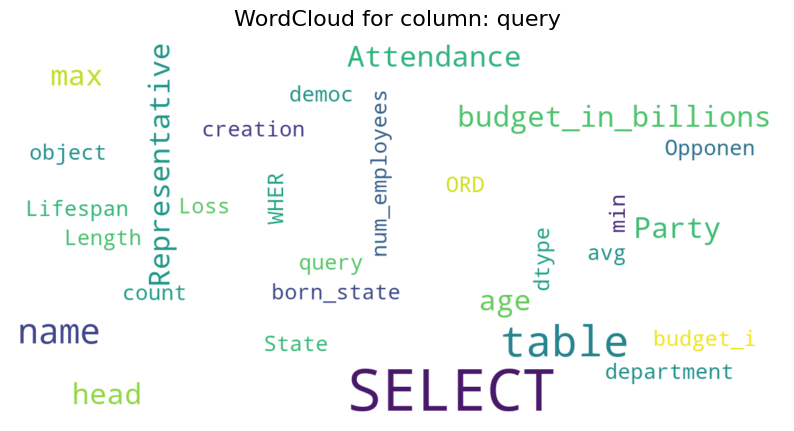


☁️ Generating WordCloud for: question


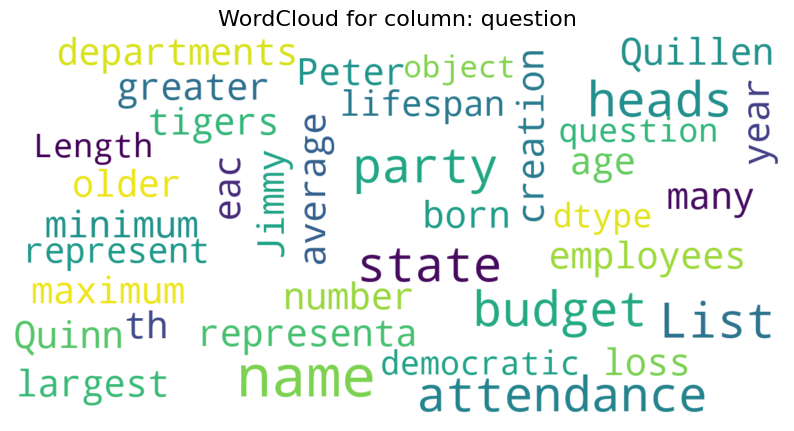

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Set base stopwords
stopwords = set(STOPWORDS)

def show_wordcloud_for_column(data, colname):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    ).generate(str(data))

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"WordCloud for column: {colname}", fontsize=16)
    plt.show()

# Loop through each column
for col in cols:
    print(f"\n☁️ Generating WordCloud for: {col}")
    show_wordcloud_for_column(df[col].dropna().astype(str), col)
